<a href="https://colab.research.google.com/github/iasmakanwal/Real-Estate-Market-Analysis/blob/iasmakanwal-patch-1/Real_Estate_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement :**
Investigation of price patterns on different types of property  (commercial/Residential),Size,according to  cities of Pakistan

**Project Objective :**

Aim is to  extract actionable insights from property listings on Zameen.com -such as pricing
trends, neighborhood comparisons, and listing quality -that can help real estate
investors make informed decisions.


# Data Understanding & Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA_Project/Scarped Zameen.com.xlsx - Sheet1.csv") #load data file

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Preliminary Analysis**

In [12]:
df.head() #see first 5 rows


,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check Dimensions**


In [13]:
df.shape  #(Rows,Columns)

(18255, 59)

**Data type checking**


In [14]:
df.info() #to see data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18255 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12  Central Air Condit

**Statistical Information Retreival**

In [15]:
df.describe() #to see statistical information (will show un-necessary calculations too)

,Built in year,Parking Spaces,Double Glazed Windows,Central Air Conditioning,Central Heating,Flooring,Electricity Backup,Waste Disposal,Floors,Other Main Features,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
count,11940.000000,9656.000000,0.0,0.0,0.0,0.0,0.0,0.0,8366.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1967.123744,5.251833,NaN,NaN,NaN,NaN,NaN,NaN,2.393677,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1949.941225,41.917894,NaN,NaN,NaN,NaN,NaN,NaN,22.849369,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2025.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,202122.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Coulmns checking**


In [16]:
df.columns #to see which columns are present

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

**Duplicates Handling**


In [17]:
# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nActual duplicate rows:")
print(duplicate_rows)
#output : No dupliacate present


Actual duplicate rows:
Empty DataFrame
Columns: [Title, URL, City, Type, Area, Price, Purpose, Location, Description, Built in year, Parking Spaces, Double Glazed Windows, Central Air Conditioning, Central Heating, Flooring, Electricity Backup, Waste Disposal, Floors, Other Main Features, Furnished, Bedrooms, Bathrooms, Servant Quarters, Drawing Room, Dining Room, Kitchens, Study Room, Prayer Room, Powder Room, Store Rooms, Steam Room, Lounge or Sitting Room, Laundry Room, Other Rooms, Broadband Internet Access, Satellite or Cable TV Ready, Intercom, Community Lawn or Garden, Community Swimming Pool, Community Gym, First Aid or Medical Centre, Day Care Centre, Kids Play Area, Barbeque Area, Mosque, Community Centre, Lawn or Garden, Sauna, Jacuzzi, Nearby Schools, Nearby Hospitals, Nearby Shopping Malls, Nearby Restaurants, Distance From Airport (kms), Nearby Public Transport Service, Other Nearby Places, Maintenance Staff, Security Staff, Other Facilities]
Index: []

[0 rows x 59 colu

In [18]:
df.duplicated().sum() #check for duplicates again

np.int64(0)

In [19]:
#check dimensions now
df.shape

(18255, 59)

**Clean messy columns**

**Currency symbol splitting and comma removals**


In [20]:
df['Price'].isna().sum() #check how  many values in price column are missing
# Replace NaN values with empty strings before processing
df['Price'] = df['Price'].fillna(0)#to split ,empty values must not be present

df['Price'].isna().sum()

np.int64(0)

In [21]:
#now splitting
df[['Prices','Price(PKR)']] = df['Price'].str.split('PKR\n', expand=True)


In [22]:
df['Price(PKR)']  #to see the column what is it containing now


,Price(PKR)
0,4.75 Crore
1,6.25 Crore
2,3.45 Crore
3,2.98 Crore
4,4.65 Crore
...,...
18250,40 Thousand
18251,14 Thousand
18252,40 Thousand
18253,1 Lakh


In [23]:
df.drop(['Prices'],axis=1,inplace=True) #un-necessary column removal

In [24]:
df=df.drop('URL',axis=1)#un-necessary column removal


**Data type formatting**                  
**(Conversion of English alphabets to whole number)**

In [25]:
def convert_amount(val):
  if pd.isna(val):
    return 0
  val = str(val).strip().lower()

  if 'crore' in val:
    return float(val.replace('crore', '').strip()) * 1e7
  elif 'lakh' in val:
    return float(val.replace('lakh', '').strip()) * 1e5
  elif 'thousand' in val:
    return float(val.replace('thousand', '').strip()) * 1e3
  elif 'arab' in val:
    return float(val.replace('arab', '').strip()) * 1e6
  elif val.isnumeric():
    return float(val)
  else:
    return 0  # or np.nan

df['Prices'] = df['Price(PKR)'].apply(convert_amount)



In [26]:
display("Top",df[['Prices']].head(10))
display("Bottom",df[['Prices']].tail(5))
display("Original vs modified",df[['Price(PKR)','Prices']])

'Top'

,Prices
0,47500000.0
1,62500000.0
2,34500000.0
3,29800000.0
4,46500000.0
5,26000000.0
6,67500000.0
7,16800000.0
8,80000000.0
9,44000000.0


'Bottom'

,Prices
18250,40000.0
18251,14000.0
18252,40000.0
18253,100000.0
18254,60000.0


'Original vs modified'

,Price(PKR),Prices
0,4.75 Crore,47500000.0
1,6.25 Crore,62500000.0
2,3.45 Crore,34500000.0
3,2.98 Crore,29800000.0
4,4.65 Crore,46500000.0
...,...,...
18250,40 Thousand,40000.0
18251,14 Thousand,14000.0
18252,40 Thousand,40000.0
18253,1 Lakh,100000.0


**Conversion of  area units**

In [27]:
# Note :Among Area Size units such as :
#       Marla, Kanal, and square yard:  (https://www.zameen.com/tools/area-unit-converter/kanal-to-sq-yards/)
#       -The smallest unit is the square yard.
#       - 1 Marla = 25 Sq yd.
#       - 1 Kanal=500 Sq. yd.
#

In [28]:
df['Area'].isna().sum() #check how  many values in price column are missing
# Replace missing values with empty strings before splitting
df['Area'] = df['Area'].fillna('NA')
df['Area'].isna().sum() #check total missing values now


np.int64(0)

#Missing Values Treatment

**Detection of missing values**

In [29]:
# Missing Value Analysis
# see missing values just
missing_values=df.isnull().sum().head(60).reset_index()
missing_values
#for furthur operation
missing_values=df.isnull().sum()
missing_percentage = (missing_values/ len(df)) * 100
print("Missing Values:\n", df.isnull().sum().head(60).reset_index())
print("\nMissing Value Percentage:\n", missing_percentage.head(60).reset_index())



Missing Values:
                               index      0
0                             Title     16
1                              City      0
2                              Type     16
3                              Area      0
4                             Price      0
5                           Purpose     16
6                          Location     16
7                       Description   3362
8                     Built in year   6315
9                    Parking Spaces   8599
10            Double Glazed Windows  18255
11         Central Air Conditioning  18255
12                  Central Heating  18255
13                         Flooring  18255
14               Electricity Backup  18255
15                   Waste Disposal  18255
16                           Floors   9889
17              Other Main Features  18255
18                        Furnished  18255
19                         Bedrooms     16
20                        Bathrooms     16
21                 Servant Quarters  

**Removal of Unnecessary colum**
**(where missing %Aage=100)**

In [30]:
#first removing some columns that are 100% missing to have clear picture
df.drop(["Double Glazed Windows",
      'Central Air Conditioning', 'Central Heating','Flooring',"Electricity Backup" ,"Waste Disposal",
                "Waste Disposal",
                "Other Main Features",
               "Furnished","Drawing Room","Dining Room","Study Room","Prayer Room","Powder Room","Steam Room",
               "Lounge or Sitting Room","Laundry Room","Other Rooms",
       "Broadband Internet Access",
    "Satellite or Cable TV Ready",
                         "Intercom",
        "Community Lawn or Garden",
        "Community Swimming Pool",
                   "Community Gym",
      "First Aid or Medical Centre",
                 "Day Care Centre",
                  "Kids Play Area",
                   "Barbeque Area",
                           "Mosque",
                 "Community Centre",
                  "Lawn or Garden",
                            "Sauna",
                         "Jacuzzi",
                   "Nearby Schools",
                 "Nearby Hospitals",
            "Nearby Shopping Malls",
               "Nearby Restaurants",
      "Distance From Airport (kms)",
  "Nearby Public Transport Service",
              "Other Nearby Places",
                "Maintenance Staff",
                   "Security Staff",
                 "Other Facilities"],axis=1,inplace=True)


In [31]:
df.drop('Servant Quarters',axis=1,inplace=True) #not going to help for our and goal  so no need to keep it

In [32]:
df.columns #to see which column remaining

Index(['Title', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces', 'Floors', 'Bedrooms',
       'Bathrooms', 'Kitchens', 'Store Rooms', 'Price(PKR)', 'Prices'],
      dtype='object')

In [33]:
#since the reference columns are not required now ,we can drop them
df.drop(['Price','Price(PKR)'],axis=1,inplace=True)

In [34]:
df.drop('Description',axis=1,inplace=True)#because of formatting issue ,we'll drop it

In [35]:
df.drop('Title',axis=1,inplace=True) # because Title is not useful for analysis

In [36]:
df.drop('Floors',axis=1,inplace=True) #because Floor has 54% data missing

In [37]:
# df.drop('URL',axis=1,inplace=True)
df.drop('Location',axis=1,inplace=True)

In [38]:
#final cleaned vew
df
#Now we have final cleaned required column
df.columns

Index(['City', 'Type', 'Area', 'Purpose', 'Built in year', 'Parking Spaces',
       'Bedrooms', 'Bathrooms', 'Kitchens', 'Store Rooms', 'Prices'],
      dtype='object')

In [39]:
df.shape #let see how many rows x column present now

(18255, 11)

In [40]:
#checking again the missing values so we can impute missing values
# Missing Value Analysis
# see missing values just
missing_values=df.isnull().sum().head(60).reset_index()
missing_values
#for furthur operation
missing_values=df.isnull().sum()
missing_percentage = (missing_values/ len(df)) * 100
print("Missing Values:\n", df.isnull().sum().head(60).reset_index())
print("\nMissing Value Percentage:\n", missing_percentage.head(60).reset_index())


Missing Values:
              index     0
0             City     0
1             Type    16
2             Area     0
3          Purpose    16
4    Built in year  6315
5   Parking Spaces  8599
6         Bedrooms    16
7        Bathrooms    16
8         Kitchens  4999
9      Store Rooms  8536
10          Prices     0

Missing Value Percentage:
              index          0
0             City   0.000000
1             Type   0.087647
2             Area   0.000000
3          Purpose   0.087647
4    Built in year  34.593262
5   Parking Spaces  47.104903
6         Bedrooms   0.087647
7        Bathrooms   0.087647
8         Kitchens  27.384278
9      Store Rooms  46.759792
10          Prices   0.000000


In [41]:
# Non-numeric Categorical Column Analysis
for col in ['Type', 'Purpose','City']:
    print(f"\nUnique values in column '{col}':")
    print(df[col].unique())
    print(df[col].value_counts())


Unique values in column 'Type':
['Flat' 'House' 'Upper Portion' 'Lower Portion' 'Penthouse' 'Farm House'
 nan 'Room']
Type
House            13386
Flat              2892
Upper Portion     1247
Lower Portion      560
Farm House          89
Room                43
Penthouse           22
Name: count, dtype: int64

Unique values in column 'Purpose':
['For Sale' nan 'For ']
Purpose
For Sale    11126
For          7113
Name: count, dtype: int64

Unique values in column 'City':
['Karachi' 'Islamabad' 'Faisalabad' 'Multan' 'Rawalpindi' 'Peshawar'
 'Jhelum' 'Murree' 'Hyderabad' 'Bahawalpur' 'Sialkot' 'Abbottabad'
 'Sahiwal' 'Lahore' 'Gujrat' 'Wah' 'Sargodha' 'Sheikhupura' 'Chakwal'
 'Naran' 'Nowshera' 'Mardan' 'Chilas' 'Sarai Alamgir' 'Quetta'
 'Rahim Yar Khan' 'Okara' 'Attock' 'Dera Ghazi Khan' 'Taxila' 'Sukkur'
 'Gwadar' 'Kasur' 'Mirpur' 'Haripur' 'Gujar Khan' 'Gharo' 'Mirpur Khas'
 'Swat' 'Daska' 'Sadiqabad' 'Buner' 'Jhang' 'Lalamusa' 'Lodhran'
 'Pakpattan' 'Chiniot' 'Dera Ismail Khan' 'Fateh 

####Imputations (Filling missing values)


In [42]:
##IMPUATIONS:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Purpose'].fillna(df['Purpose'].mode()[0],inplace=True)

df['Parking Spaces'].fillna(df['Parking Spaces'].mode()[0],inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].mode()[0],inplace=True)
df['Bathrooms'].fillna(df['Bathrooms'].mode()[0],inplace=True)
df['Kitchens'].fillna('NA',inplace=True)
df['Built in year'].fillna('NA',inplace=True)
df['Store Rooms'].fillna('NA',inplace=True)

print("All done")


All done


/tmp/ipython-input-42-3797366363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(df['Type'].mode()[0],inplace=True)
/tmp/ipython-input-42-3797366363.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [43]:
df.isnull().sum()

#Output will show if the null values are still present in our columns or not)

,0
City,0
Type,0
Area,0
Purpose,0
Built in year,0
Parking Spaces,0
Bedrooms,0
Bathrooms,0
Kitchens,0
Store Rooms,0


#Data cleaning and Inconsistency

###Checking inconsistent Entries

In [44]:
!pip install fuzzywuzzy  #install fuzzywuzzy

In [45]:
# helpful modules to see inconsistencies
import fuzzywuzzy
from fuzzywuzzy import process

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [46]:
df['City'].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
       'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
       'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
       'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
       'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
       'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
       'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
       'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian', 'Karachi ',
       'Islamabad ', 'Faisalabad ', 'Multan ', 'Rawalpindi ',
       'Gujranwala ', 'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ',
       'Sialkot  ', 'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Wah ',
       'Gujrat ', 'Sahiwal ', 'Sheikhupura

In [47]:
#************* Operation on City column to see sorted cities *********************
# get all the unique values in the 'City' column
df['City']=df['City'].str.lower()
cities= df['City'].unique()

# sort them alphabetically and then take a closer look
cities.sort()
cities
#Output will show there is no incosistent entry present in City column of our Table


array(['abbottabad', 'abbottabad ', 'attock', 'attock ', 'bahawalpur',
       'bahawalpur ', 'buner', 'burewala', 'chakwal', 'chilas', 'chiniot',
       'daska', 'dera ghazi khan', 'dera ghazi khan ', 'dera ismail khan',
       'faisalabad', 'faisalabad ', 'fateh jang', 'galyat', 'gharo',
       'gujar khan', 'gujranwala', 'gujranwala ', 'gujrat', 'gujrat ',
       'gwadar', 'hafizabad', 'haripur', 'hyderabad', 'hyderabad ',
       'islamabad', 'islamabad ', 'jamshoro', 'jhang', 'jhelum',
       'jhelum ', 'karachi', 'karachi ', 'kasur', 'kharian', 'lahore',
       'lahore ', 'lalamusa', 'lodhran', 'mardan', 'mardan ', 'mirpur',
       'mirpur khas', 'multan', 'multan ', 'murree', 'murree ', 'naran',
       'nowshera', 'nowshera ', 'okara', 'okara ', 'pakpattan',
       'peshawar', 'peshawar ', 'quetta', 'rahim yar khan',
       'rahim yar khan ', 'rawalpindi', 'rawalpindi ', 'sadiqabad',
       'sahiwal', 'sahiwal ', 'sarai alamgir', 'sarai alamgir ',
       'sargodha', 'sargodha ', '

In [48]:
#************* Operation on Type column *********************

df['Type']=df['Type'].str.lower()
property_types=df['Type'].unique()

# sort them alphabetically and then take a closer look
property_types

print(property_types,"\nThere is no inconsistent entry here")#just some imputed NA values here with required  data

['flat' 'house' 'upper portion' 'lower portion' 'penthouse' 'farm house'
 'room'] 
There is no inconsistent entry here


In [49]:
df['Type'].unique() #include imputed NA values too

array(['flat', 'house', 'upper portion', 'lower portion', 'penthouse',
       'farm house', 'room'], dtype=object)

In [50]:
df['Type'].nunique()

7

In [51]:
df['Purpose'].unique() # We donot know some values are for sale or for rent
#note :no any blank entry in purpose column

array(['For Sale', 'For '], dtype=object)

In [52]:
#Fill missed datapoints as there is inconsistency
#Assumption :
# ('since there is any single entry named as 'For Rent',so we'll assume it as 'For sale')

#*******************************************************************************************#
# get all the unique values in the 'Purpose' column
forsale = df['Purpose'].unique()

# sort them alphabetically and then take a closer look
forsale.sort()
forsale

# get the top 10 closest matches to "For"
matches = fuzzywuzzy.process.extract("For", forsale, limit=2)

# take a look at them
matches


[('For ', 100), ('For Sale', 90)]

###Dealing with Inconsistency

In [53]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_match = 2):
    # get a list of unique strings
    strings = df[column].unique()

    # get the top 2 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings,
                                         limit=2)

    # only get matches with a ratio >=2
    close_matches = [matches[0] for matches in matches if matches[1] >= min_match]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches
    df.loc[rows_with_matches, column] = string_to_match

    # let us know the function's done
    print("All done!")

In [54]:
replace_matches_in_column(df=df, column='Purpose', string_to_match="For sale",min_match = 2)
df.Purpose.unique()
df['Purpose'].unique()


All done!


array(['For sale'], dtype=object)

In [55]:
print(df['Purpose'].nunique())

1


In [56]:
df.shape

(18255, 11)

In [57]:
print("Cleaning and preparation of data is done")

Cleaning and preparation of data is done


In [58]:
df.head(5)


,City,Type,Area,Purpose,Built in year,Parking Spaces,Bedrooms,Bathrooms,Kitchens,Store Rooms,Prices
0,karachi,flat,128 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,47500000.0
1,karachi,flat,161 Sq. Yd.,For sale,NA,1.0,2,3,1.0,NA,62500000.0
2,karachi,flat,111 Sq. Yd.,For sale,NA,1.0,1,2,NA,NA,34500000.0
3,karachi,flat,106 Sq. Yd.,For sale,2.0,1.0,1,2,4.0,1.0,29800000.0
4,karachi,flat,156 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,46500000.0


In [60]:
df

,City,Type,Area,Purpose,Built in year,Parking Spaces,Bedrooms,Bathrooms,Kitchens,Store Rooms,Prices
0,karachi,flat,128 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,47500000.0
1,karachi,flat,161 Sq. Yd.,For sale,NA,1.0,2,3,1.0,NA,62500000.0
2,karachi,flat,111 Sq. Yd.,For sale,NA,1.0,1,2,NA,NA,34500000.0
3,karachi,flat,106 Sq. Yd.,For sale,2.0,1.0,1,2,4.0,1.0,29800000.0
4,karachi,flat,156 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,46500000.0
...,...,...,...,...,...,...,...,...,...,...,...
18250,nowshera,house,10 Marla,For sale,2024.0,1.0,5,5,2.0,1.0,40000.0
18251,okara,house,2 Marla,For sale,2022.0,1.0,2,2,1.0,1.0,14000.0
18252,okara,house,8 Marla,For sale,2024.0,3.0,3,3,2.0,NA,40000.0
18253,attock,house,1 Kanal,For sale,2021.0,1.0,6,5,1.0,NA,100000.0


# Feature Engineering


**Categorization of  Property (Commercial/Residential)**

In [61]:
df['Category'] = df['Type'].apply(lambda x: 'Commercial' if x in ['Flat', 'Penthouse'] else 'Residential')


In [62]:
df['Category']

,Category
0,Residential
1,Residential
2,Residential
3,Residential
4,Residential
...,...
18250,Residential
18251,Residential
18252,Residential
18253,Residential


**Conversion to sqrfoot**

Assumption :Generally property types could be

     ->agricultural
     ->commercial
     ->residential

In this data,only commercial and residential types are present

In [63]:
def convert_area_to_sqrft(row):
    val = row['Area']
    category = row['Category']

    if pd.isna(val):
        return 0

    val = str(val).strip().lower().replace(',', '')

    if category == 'Commercial':
        if 'marla' in val:
            return float(val.replace('marla', '').strip()) * 225  #marla will be multipled by 225 for sqrft in  commercial type
        elif 'kanal' in val:
            return float(val.replace('kanal', '').strip()) * 4500   #kanal will be multipled by 4500 for sqrft in  commercial type
        elif 'sq. yd.' in val:
            return float(val.replace('sq. yd.', '').strip()) * 9    #sq.yd  will be multipled by 9 for sqrft in  commercial type
        elif val.replace('.', '', 1).isdigit():
            return float(val)
        else:
            return 0

    elif category == 'Residential':
        if 'marla' in val:
            return float(val.replace('marla', '').strip()) * 250  #marla will be multipled by 250 for sqrft in resendial type
        elif 'kanal' in val:
            return float(val.replace('kanal', '').strip()) * 5000  #kanal will be multipled by 5000 for sqrft in resendial type
        elif 'sq. yd.' in val:
            return float(val.replace('sq. yd.', '').strip()) * 9   #sq.yard  will be multipled by 9  for sqrft in resendial type
        elif val.replace('.', '', 1).isdigit():
            return float(val)
        else:
            return 0

    else:
        return 0


In [64]:
df['Area(sq.ft)'] = df.apply(convert_area_to_sqrft, axis=1)

<!-- According to zameen.com calculator
Residential---250sqft in 1 Marla , 9 sqr feet in 1 sqr.yard and 5000 sq feet in 1 kanal

Commercial ---225sqrft in 1 Marla , 9 sqr feet in 1 sqr.yard and  4500 sq feet in 1 kanal -->


 Interpretation : According to  zameen.com calculator

Commercial : 9 sq feet in 1 yard , 225 sq feet in 1 marla ,4500 sqr feet in 1 kanal

Residential: 9 sq feet in 1 yard , 250 sq feet in 1 marla , 5000 sqr feet in 1  kanal

In [65]:
df   #to see what we have now


,City,Type,Area,Purpose,Built in year,Parking Spaces,Bedrooms,Bathrooms,Kitchens,Store Rooms,Prices,Category,Area(sq.ft)
0,karachi,flat,128 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,47500000.0,Residential,1152.0
1,karachi,flat,161 Sq. Yd.,For sale,NA,1.0,2,3,1.0,NA,62500000.0,Residential,1449.0
2,karachi,flat,111 Sq. Yd.,For sale,NA,1.0,1,2,NA,NA,34500000.0,Residential,999.0
3,karachi,flat,106 Sq. Yd.,For sale,2.0,1.0,1,2,4.0,1.0,29800000.0,Residential,954.0
4,karachi,flat,156 Sq. Yd.,For sale,NA,1.0,2,2,NA,NA,46500000.0,Residential,1404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,nowshera,house,10 Marla,For sale,2024.0,1.0,5,5,2.0,1.0,40000.0,Residential,2500.0
18251,okara,house,2 Marla,For sale,2022.0,1.0,2,2,1.0,1.0,14000.0,Residential,500.0
18252,okara,house,8 Marla,For sale,2024.0,3.0,3,3,2.0,NA,40000.0,Residential,2000.0
18253,attock,house,1 Kanal,For sale,2021.0,1.0,6,5,1.0,NA,100000.0,Residential,5000.0


#Univariate,Bivariate and Multivariate Analysis

In [66]:
df.columns

Index(['City', 'Type', 'Area', 'Purpose', 'Built in year', 'Parking Spaces',
       'Bedrooms', 'Bathrooms', 'Kitchens', 'Store Rooms', 'Prices',
       'Category', 'Area(sq.ft)'],
      dtype='object')

In [67]:
import seaborn as sns

In [68]:
#Our final analysis doesnt require un-nessary columns
# we need Uniform Area(sqrfoot),so mixed area units  not required now
df.drop('Area',axis=1,inplace=True)

####Outliers value analysis of Price

In [69]:
#Detection of outliers in Price
numerical_features = ['Prices']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    # Display a few outlier
    display(outliers[[col]].head())



Number of outliers in Prices: 1236


,Prices
13,105000000.0
23,105000000.0
39,394000000.0
44,230000000.0
45,175000000.0


In [70]:
#Capping outliers in Price
def detect_outliers_iqr(numerical_features):
    Q1 = numerical_features.quantile(0.25)
    Q3 = numerical_features.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numerical_features[(numerical_features < lower_bound) | (numerical_features > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df['Prices'])
print("\nPrice Outliers:\n", outliers)



Price Outliers:
 13       105000000.0
23       105000000.0
39       394000000.0
44       230000000.0
45       175000000.0
            ...     
10828     87500000.0
10878    130000000.0
10880     90000000.0
11052     90000000.0
11069     95000000.0
Name: Prices, Length: 1236, dtype: float64


Text(0, 0.5, 'Frequency')

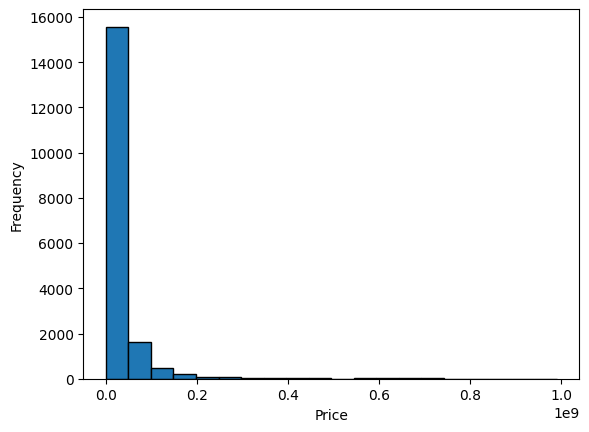

In [71]:
import matplotlib.pyplot as plt
plt.hist(df['Prices'], bins=20, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')


**Interpretation :**

It displays a highly  right-skewed distribution with the very vast majority of properties (approximately 15,000+ out of Approx.16,000) with price near 0 PKR.

**Outlier Handling**

In [72]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound) #instead of removing,I'll cap them

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Prices'],edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')

**Interpretation :**

1-Price values around 0-10M appear approx. 7,800 times in the dataset
This suggests that many properties share  very similar price values in this range

2-Moderate Repetition in Mid-Range:
Price values in 10-20M range appear 2200-2400 times each
(could be resendential properties)


3-Low Repetition in Higher Prices

Price values in 30-70M range appear much less frequently (1,400 times)
which Suggests more custom pricing in premium segments(expensive ones)

4-The peak at 80Million (approx.1,400 repetitions) show that  pricing for commercial propertis indicate common listing price threshold for people who want to buy


####Univariate analysis of Price

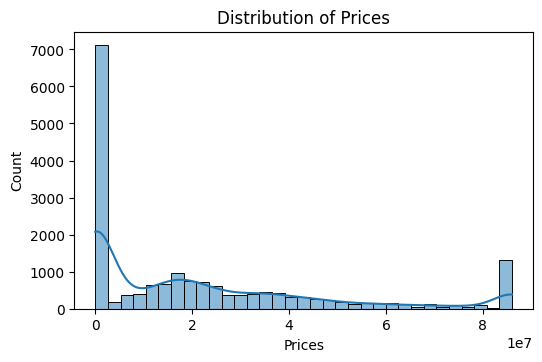

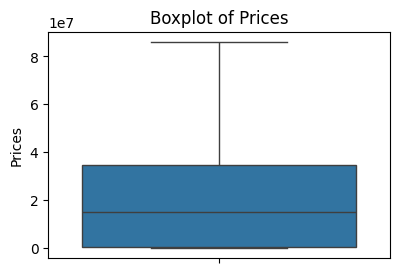

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for price
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Boxplots for price to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.show()



**Interpretation**


Q1 (25th percentile):- 25% of properties are priced below 5M

Median (Q2, 50th percentile): approx.17M  that tells  middle value where half the properties
are above/below

Q3 (75th percentile): approx.35M - that tells 75% of properties are priced below 35M

Interquartile Range (IQR): approx.30M  that  shows the spread of the middle 50% of data

hence we can say:
Most market activity occurs in the 5-35M range

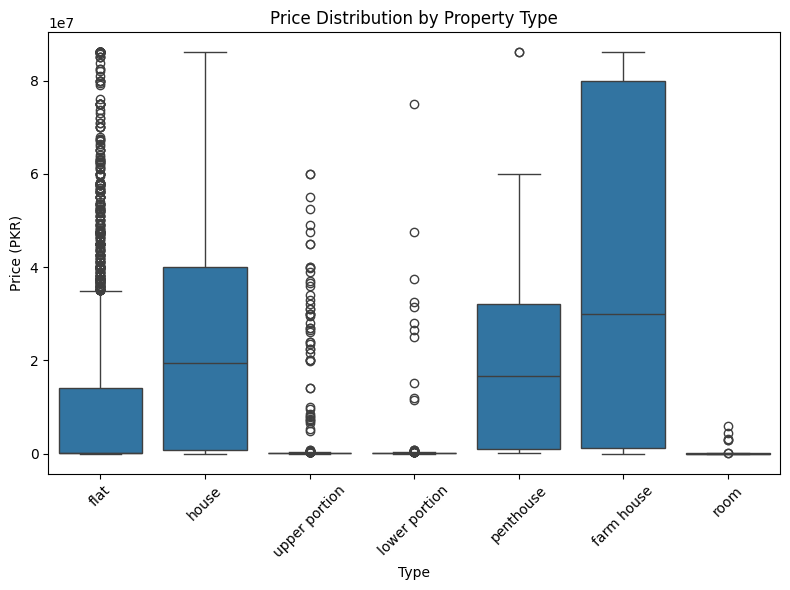

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Prices')
plt.title('Price Distribution by Property Type')
plt.ylabel('Price (PKR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation**

->Premium Property Categories:

1-Farm House: Highest median price (approx.30M) with widest price range, extending to 80M+

2-Penthouse: Second highest median (approx.17M) with moderate range up to 60M

3-House: Third highest median (approx.19M) with significant variation, many outliers up to 85M+

-> Mid-Range Properties:

Flat: Lower median (approx.14M) but extremely wide distribution with many high-value outliers reaching 85M+

Upper Portion: Very low median (approx.1M) with some outliers up to 60M


Budget Categories:

-> Lower Portion: Lowest median (approx. 0.5M) with low variation and so many outliers
-> Room: Consistently low prices (approx. 0.5M) with low outliers


####Outlier values analysis of area

In [75]:
#Detection of outlier in area
numerical_feature_area = ['Area(sq.ft)']
for col in numerical_feature_area:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")



Number of outliers in Area(sq.ft): 1113


Text(0, 0.5, 'Frequency')

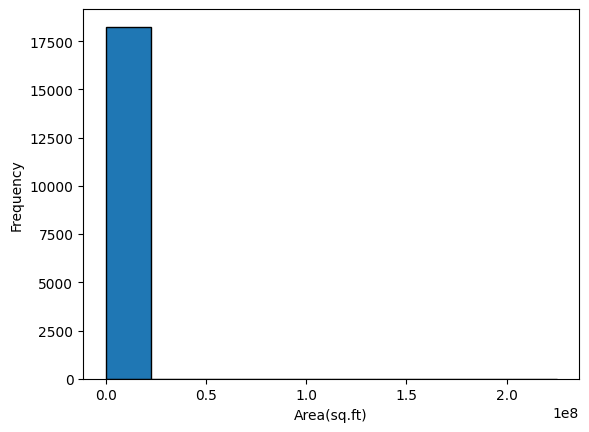

In [76]:
import matplotlib.pyplot as plt
plt.hist(df['Area(sq.ft)'],edgecolor='k')
plt.xlabel('Area(sq.ft)')
plt.ylabel('Frequency')

**Interpretation**
Analysis of Area Distribution - Value Repetition Frequency
What This Shows:

Y-axis (Frequency): How many times each specific area value (in sq.ft) appears in the dataset
X-axis (Area): Property area(sqrft) values that are repeating

Key Insights:


Area values around 0-10M sqrft appear approx.18,000 times
This massive repetition suggests:

Many properties with missing or zero area data

Thus
It Suggests need for data cleaning before furthur area analysis

**Removal of outlier**

In [77]:
for col in numerical_feature_area:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound) #instead of removing,I'll cap them

    #Assumption: Maybe that outliers (most probably values in 'Arab' would give insights so removing them isn't good idea)
    #so I'll cap them instead of removing


In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Area(sq.ft)'],edgecolor='k')
plt.xlabel('Area(sq.ft)')
plt.ylabel('Frequency')

**Interpretation:**

It shows :
Clear peaks at 1500-2000 and 3000 sq.ft

and suggests two distinct market segments
Standard vs. premium commercial categories


**key insights:**

Most common house size is 1500-2000 sq.ft (as it appears approx. 5,800 times)


**-->For Buyers**:
1500-2000 sq.ft houses are everywhere - lots of choices but also lots of competition

3000 sq.ft houses are common for bigger families

5000 sq.ft houses are for wealthy buyers


**-->For Sellers:**

-If  house is 1500-2000 sq.ft,but  there will be more competetion  with many similar houses
-Unusual sizes (like 2500 sq.ft) might be easier to sell because there's less competition




####Univariate analysis of Area

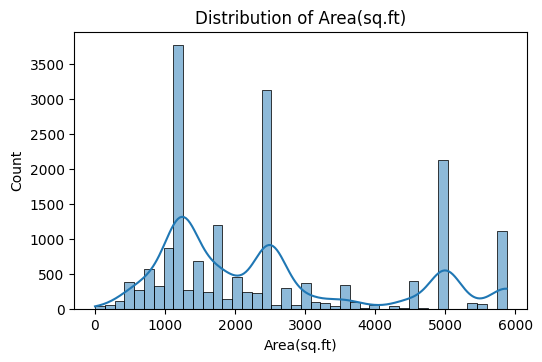

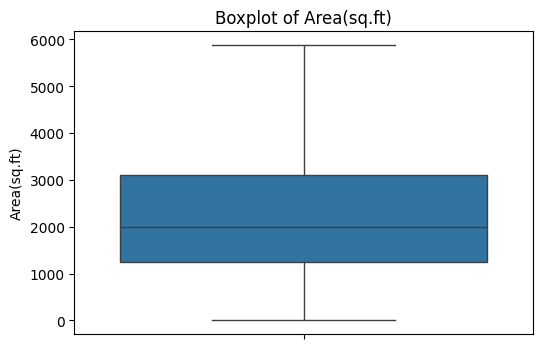

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for Area
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_feature_area):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Boxplots for price to visualize the distribution of the data.
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_feature_area):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Interpretation for distribution of area**

Main Findings:
Most Popular House Sizes:

1200 sq.ft - Highest peak (approx.3,700 properties) - Small to medium homes
2500 sq.ft - Second peak (approx.3,100 properties) - Large family homes
5000 sq.ft - Third peak (approx.2,200 properties) - Luxury homes
6000 sq.ft - Smaller peak (approx.1,100 properties) - Very large homes



**Interpretation for boxplot of area**

This shows the statistical summary of all property sizes in the market
The box and lines tell us about typical, small, and large properties
Main Findings:
Typical Property Sizes:

Q1 (approx.1,400 sq.ft): 25% of properties are smaller than this
Median (approx.2,000 sq.ft): Half of all properties are above/below this size
Q3 (approx.3,100 sq.ft): 75% of properties are smaller than this

Range: Most properties are between 1,400-3,100 sq.ft


Simple points to note:

Most common range: 1400-3100 sqr.ft area
Anything above 3100 sq.ft is considered large
Very few properties are bigger than 6,000 sq.ft


**Reasoning**:
Univariate analysis is done. The next step is to perform bivariate analysis.

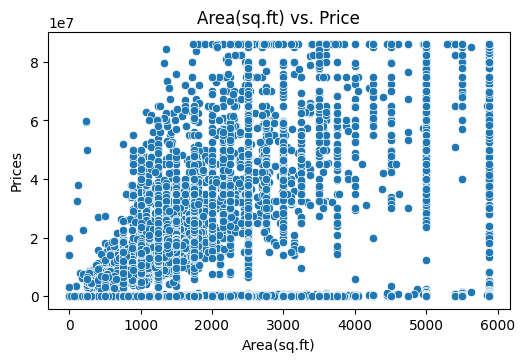

In [79]:
# Bivariate Analysis
#Analysis of Area vs Price
plt.figure(figsize=(15, 10))
# Scatter plots for Area vs. price
for i, col in enumerate(numerical_feature_area):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['Prices'])
    plt.title(f'{col} vs. Price')
plt.tight_layout()
plt.show()

#only area vs. price dont give any trend or insight


**Interpretation**

No clear Trend  between size and price is visible in this plot

Location,city would matters most size alone cannt affect price

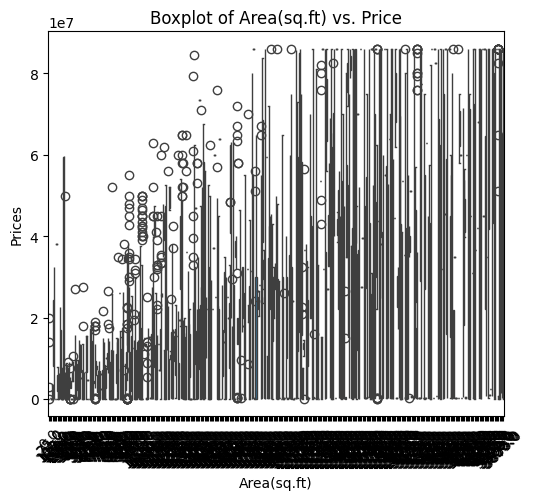

In [80]:
# Boxplots for categorical features vs. price
plt.figure(figsize=(20, 5))
area_colum=['Area(sq.ft)']
for i, col in enumerate(area_colum):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['Prices'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. Price')

plt.show() #it will so many outliers and zero trend

**Interpretation**


Due to too many unique values
on the x-axis,
it's cluttered and hard to understand

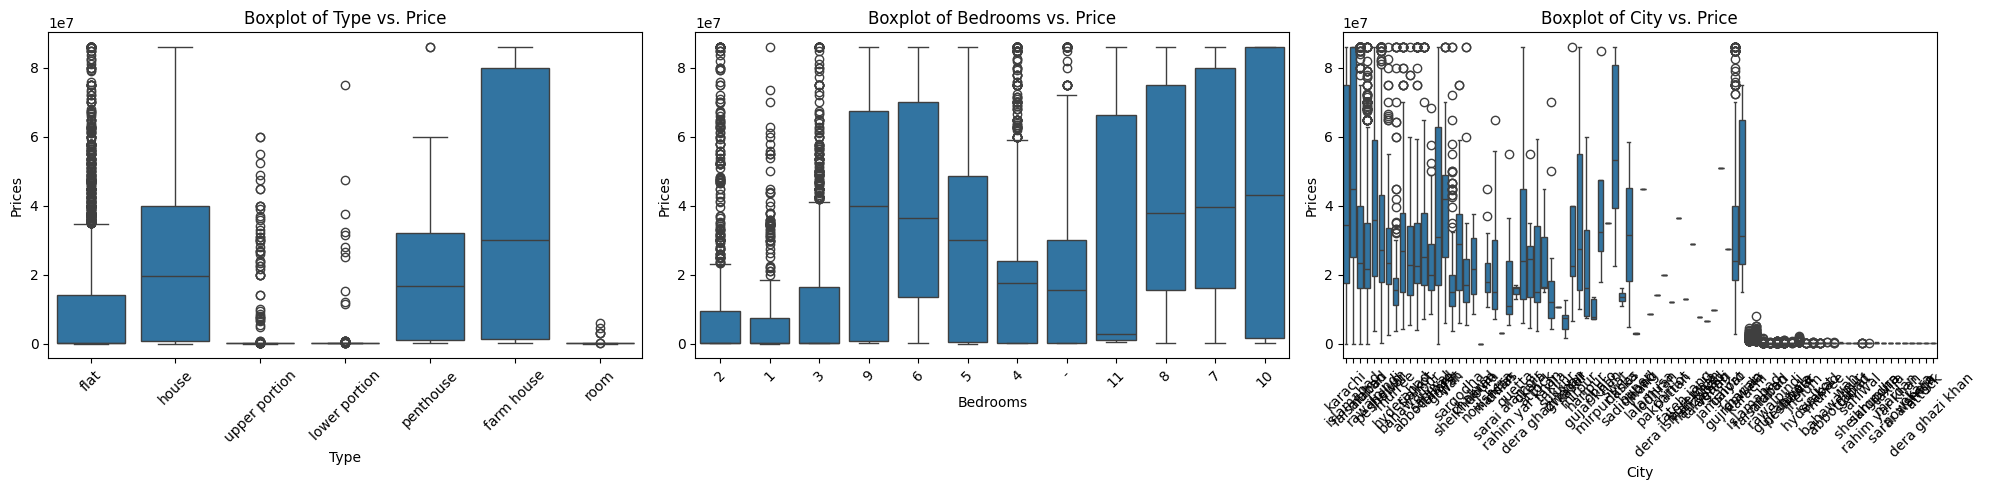

In [81]:
# Boxplots for categorical features vs. price
plt.figure(figsize=(20, 5))
categorical_cols=['Type','Bedrooms','City']
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['Prices'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. Price')

plt.tight_layout()
plt.show()

**Interpretation**

1-Karachi covers just 35M as median,other cities are showing  too cluttered in plot

2-Farm House has highest median price approx.30M

3-Penthouse second highest approx.17M median

4- House third highest approx.(19M) median

5- Flat is having lower median of 14M  and with  many high-value outliers up to 85M

6-Upper Portion very low median approximatly 1M

7-Lower Portion and Room consistently cheapest  which is 0.5M each




**Heatmap**


In [82]:
df.corr(numeric_only=True)

,Parking Spaces,Prices,Area(sq.ft)
Parking Spaces,1.000000,0.010148,-0.017180
Prices,0.010148,1.000000,0.374282
Area(sq.ft),-0.017180,0.374282,1.000000


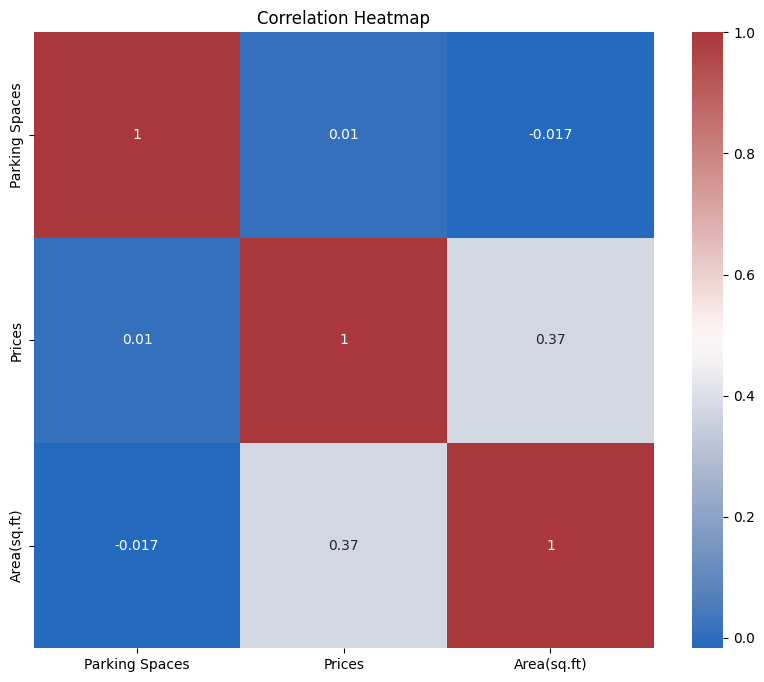

In [83]:
# correlation  between variables'coolwarm'
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap')
plt.show()

**Interpretation**

Price and Area are positively correlated but parking spaces is not
So Increasing/Decreasing area would definitely affect price

#Insights & Recommendations

**Area and Price**



1-Monitor the farm house  category  for potential high-value opportunities


2-Investors are recommended to focus on mid-range properties such as 1,000-2,500 sqrft area

3-There's a positive correlation between area and price BUT so many variations happens according to other variables such as city,parking spaces etc affect strognly


4-Buyers would target 2-3 bedroom properties for good value in the residential segment,so good opportunity  for sellers


5-Properties around 1,500-2,000 sq ft  area here are  providing  better price-per-square-foot ratio

6-Upper and lower portion properties show less price variations


#Conclusion & Next Steps

**Summary of findings**

The real estate data shows a  big differences in prices across different property types and locations.
Farm houses are the most expensive properties, while most regular homes are between 1,000-2,500 square feet in size. There's a major problem with the data - over 7,000 properties show prices close to zero, which could mean foreclosed homes or any kind of data entry(collection) mistakes.

Bigger homes with 5-6 bedrooms cost the most, and location matters a lot for pricing - some cities are much more expensive than others.

The market has two main groups: luxury properties (penthouses and farms) and regular family homes.
Home size and price go up together, but other things like location also affect the final price.
Properties around 1,500-2,000 square feet give the best value for money.

**Recommendations for skateholders**



1-It is recommended to  buy farm houses for higher profits , but keep most of your money in regular family homes

2-Focus on buying homes between 1,000-2,500 square feet since these sell easily and have good demand

3-Go for 3-4 bedroom house property


<!-- Download the new data to perform visualization -->


Download the new data in your drive  to perform visualization


In [84]:
from google.colab import files
df.to_csv('real_estate_insights.csv', index=False)
files.download('real_estate_insights.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>